<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Intro to Classification + KNN

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Intuition behind the KNN algorithm
- Implementing KNN with sklearn

---

# K Nearest Neighbors classification walkthrough

From here on out we are going to look at how the kNN algorithm classifies an unknown point using the Iris dataset.

---

<a id='nonparametric'></a>

### Note on parametric vs. nonparametric methods

Thus far, all of our tests and methods have been **parametric**. That is, we have assumed a certain distribution for our data. In linear regression our parameters are the coefficients in our model, and our estimate of the target is calculated from these parameters.

There are alternatives in the case where we cannot assume a particular distribution for our data or choose not to. These methods are **nonparametric** When we make no assumptions about the distribution for our data, we call our data nonparametric. For nearly every parametric test, there is a nonparametric analog available. The KNN model is an example of a nonparametric model. You can see that there are no coefficients for the different predictors and our estimate is not represented by a formula of our predictor variables.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manhattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

[NOTE: in the case of ties, `sklearn`'s `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]



<a id='euclidean'></a>
## Euclidean distance

---
KNN typically uses one of two distance metrics: euclidean or manhattan. Other distance metrics (e.g. Minkwoski) are possible, but rare.


Recal the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

### $$\text{Euclidean  distance}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in `sklearn`).


## Load libraries
---

We'll need the following libraries for today's lecture:
1. `pandas`
2. `numpy`
3. `matplotlib` and `seaborn`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
5. The `load_iris` function from `sklearn`'s `datasets` module
6. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.datasets as skds
import sklearn.preprocessing as skpp
import sklearn.model_selection as skms
import sklearn.neighbors as sknb
import sklearn.metrics as skm

%matplotlib inline

## The Iris Dataset
---

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. - [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Most `sklearn` datasets can be ran as follows:
```python
data = load_iris()
```

In [2]:
data = skds.load_iris()

## `load_iris()` properties
---

The `data` variable has several important properties you'll need to be familiar with:
1. `data.data`: This is your `X`. In our case, it's a 150x4 matrix of features.
2. `data.target`: This is your `y`. It's an array of 150 values (0, 1, 2). Each index corresponds do a different species of Iris flower.
3. `data.feature_names`: These are the names of each of your 4 features (corresponding to the 4 columns in `data.data`
4. `data.target_names`: These are the names of your 3 Iris species: Setosa, Versicolor and Virginica. **The order in `data.target_names` corresponds to the index in `data.target`.**

## Challenge: Create a `pandas` DataFrame from `load_iris()`
---

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df['species'] = data.target

## Data Cleaning
---

Let's see if our `DataFrame` requires any cleaning. In the cells below:
1. Check the `dtypes` to make sure every column is numerical
2. Check for null values

In [6]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int32
dtype: object

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## EDA: Visualizing KNN
---

Using `matplotlib`, create a scatter plot using two features from your `DataFrame`: `'petal length (cm)'` and `'petal width (cm)'`. Each dot should be colored according to its species.

In [20]:
colors = ['r', 'g', 'b']
color_series = df['species'].map(lambda s: colors[s])

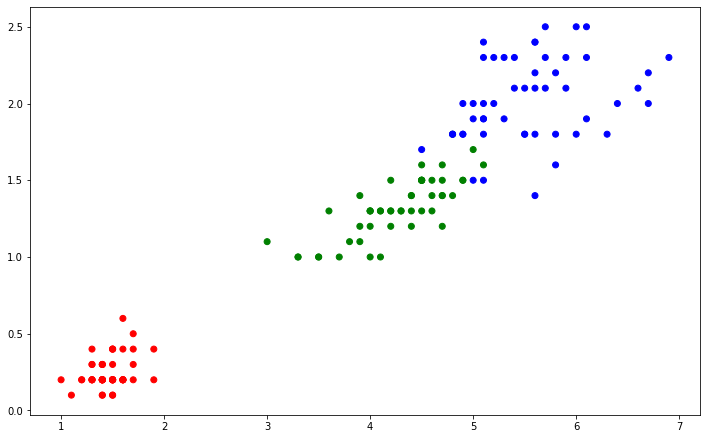

In [21]:
fig, ax = plt.subplots(figsize=(12, 7.5))

ax.scatter(df['petal length (cm)'], df['petal width (cm)'], c=color_series)

## EDA: Pairplot
---

Let's expand on the scatter plot created in the previous step. We can use `seaborn`'s `.pairplot()` method to create scatter plots using all of our features.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


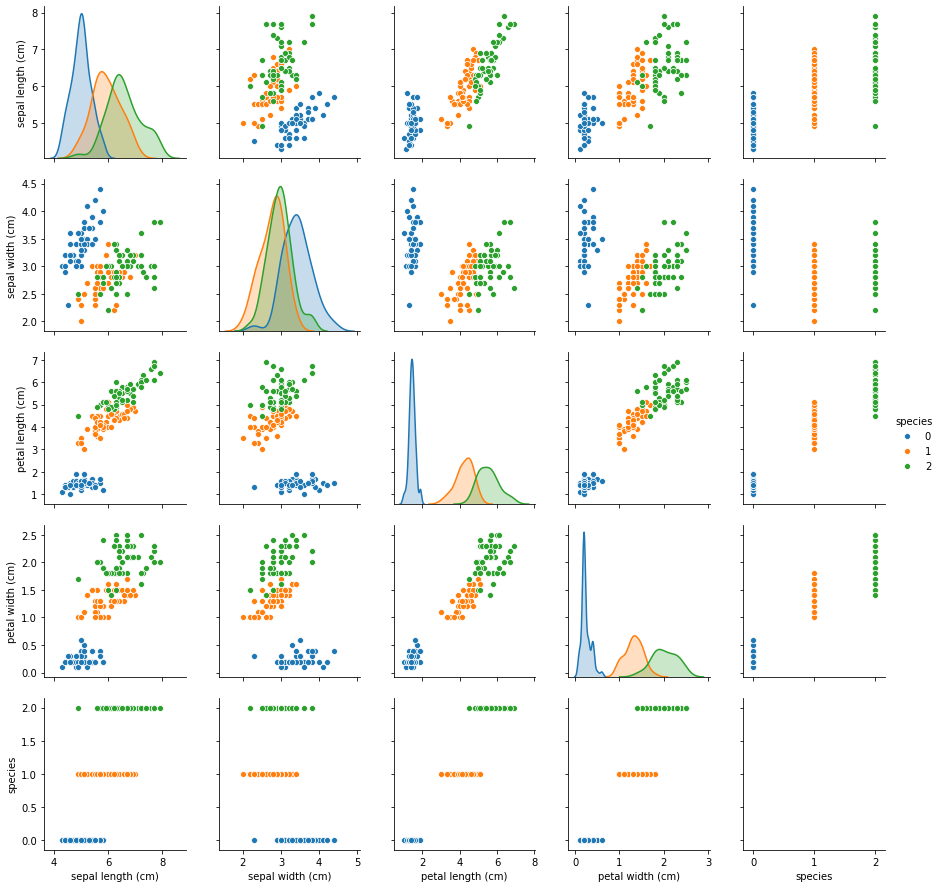

In [18]:
sb.pairplot(df, hue='species')

## Train/Test split
---

Use the `train_test_split` function to split your data into a training set and a holdout set.

In [76]:
features = [x for x in df.columns if x != 'species']
X = df[features]
y = df['species']

In [77]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=42)

## `StandardScaler`
---

Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of your features. For example, if we were using KNN on a housing dataset, a feature like square footage (measured in **thousands** of feet^2) can really affect the distance. 

Thus, in order for KNN to work properly, it's important to scale our data. In the cells below, create an instance of `StandardScaler` and use it to transform `X_train` and `X_test`.

In [78]:
pd.options.mode.chained_assignment = None

In [79]:
std_scaler = skpp.StandardScaler()

X_train[features] = std_scaler.fit_transform(X_train)
X_test[features] = std_scaler.fit_transform(X_test)

In [80]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-1.473937,1.203658,-1.562535,-1.312603
15,-0.133071,2.992376,-1.276006,-1.045633
65,1.085898,0.085709,0.385858,0.289218
11,-1.230143,0.756479,-1.218701,-1.312603
42,-1.717731,0.309299,-1.390618,-1.312603


## Instantiate KNN
---

For the `KNeighborsClassifier`, there a few important parameters to keep in mind:

1. `n_neighbors`: this is the "K" in KNN. The best K will change from problem to problem, but the default is 5.
2. `weights`: The neighbors can all have an equal vote (`uniform`), or the closer points can have a higher weighted vote (`distance`).
3. `p`: The distance metric. The default is Euclidean distance (2). Changing it to 1 is setting the distance to Manhattan.

In the cell below, instantiate a `knn` model using the default parameters.

In [46]:
knn = sknb.KNeighborsClassifier()

## Cross validation
---

In the cell below, use `cross_val_score` to see what accuracy we can expect from our KNN model.

In [47]:
skms.cross_val_score(knn, X_train, y_train, cv=5)

array([0.92      , 0.95833333, 0.83333333, 1.        , 0.86956522])

What happens if you change the value of K to 2?

In [49]:
skms.cross_val_score(sknb.KNeighborsClassifier(n_neighbors=2), X_train, y_train, cv=5)

array([0.92      , 0.95833333, 0.875     , 1.        , 0.91304348])

## Model fitting and evaluation
---

Now that we know what we can expect from our KNN model, let's 
1. fit the model to `X_train_scaled`, `y_train`
2. score it on `X_test_scaled`, `y_test`

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
knn.score(X_train, y_train)

0.9583333333333334

In [56]:
knn.score(X_test, y_test)

0.9666666666666667